In [1]:
import os 
from openslide import OpenSlide
import matplotlib.pyplot as plt

In [2]:
data_path = '/data/PAIP/training data'
wsi = OpenSlide(os.path.join(data_path,'training_data_01.svs'))

In [3]:
wsi.dimensions

(123504, 90482)

In [4]:
wsi.level_dimensions

((123504, 90482), (30876, 22620), (7719, 5655), (3859, 2827))

(2827, 3859, 3)


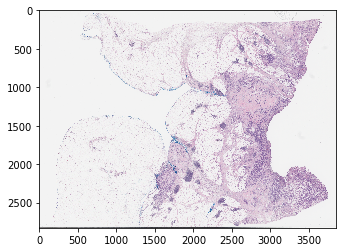

In [175]:
level0 = wsi.read_region((0,0), 3, (3859, 2827))
level0 = np.asarray(level0.convert('RGB'))
print(np.shape(level0))
plt.imshow(level0) #RGBA

In [348]:
from normalizeStaining import normalizeStaining
normed_level0, h_level0, e_level0 = normalizeStaining(level0)

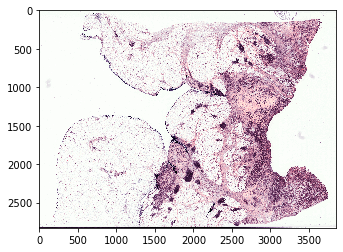

In [177]:
plt.imshow(normed_level0)

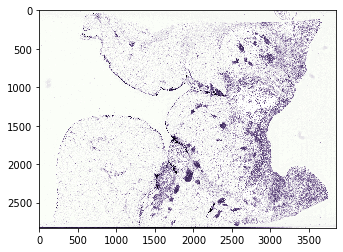

In [178]:
plt.imshow(h_level0)

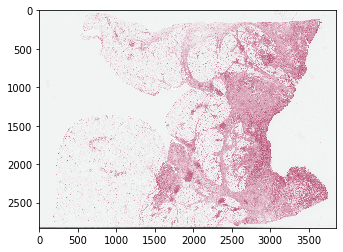

In [179]:
plt.imshow(e_level0)

In [350]:
import cv2
kernel = 19

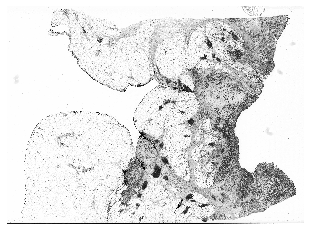

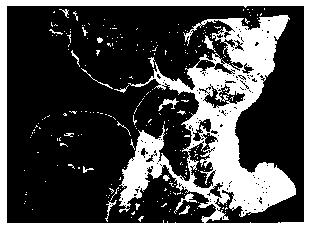

In [325]:
# convert to grayscale
gray = cv2.cvtColor(normed_level0, cv2.COLOR_RGB2GRAY)

# Otsu's thresholding
blur = cv2.GaussianBlur(gray,(kernel,kernel),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(255-th2, cmap='gray')
plt.axis('off')
plt.show()

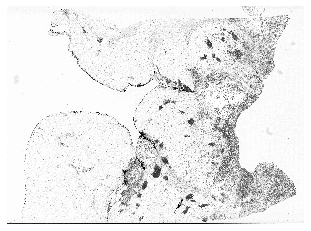

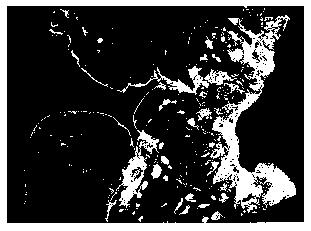

In [326]:
# convert to grayscale
gray = cv2.cvtColor(h_level0, cv2.COLOR_RGB2GRAY)

# Otsu's thresholding
blur = cv2.GaussianBlur(gray,(kernel,kernel),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(255-th2, cmap='gray')
plt.axis('off')
plt.show()

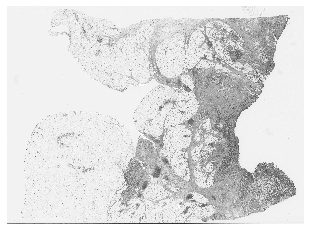

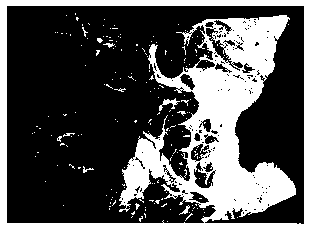

In [367]:
# convert to grayscale
gray = cv2.cvtColor(e_level0, cv2.COLOR_RGB2GRAY)

# Otsu's thresholding
blur = cv2.GaussianBlur(gray,(kernel,kernel),0)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(255-th2, cmap='gray')
plt.axis('off')
plt.show()

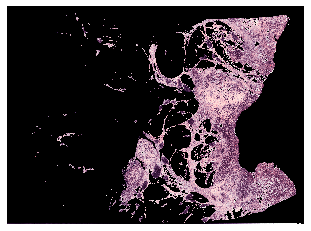

In [369]:
w, h, c = np.shape(normed_level0)
mask = np.zeros((w, h, c))
for i in range(3):
    mask[...,i] = (255-th2)*1
plt.imshow(normed_level0*mask/65535)
plt.axis('off')
plt.show()

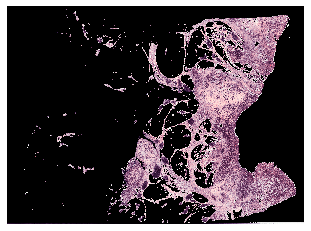

In [372]:
img = (255-th2).copy()
closing = cv2.dilate(img,np.ones((5,5),np.uint8),iterations = 1)
mask = np.zeros((w, h, c))
for i in range(3):
    mask[...,i] = closing*1
plt.imshow(normed_level0*mask/65535)
plt.axis('off')
plt.show()